<h2>DATA 620 - Week 7 - Network Reduction Island Method</h2>

<h3>Mohamed Thasleem, Kalikul Zaman</h3>
<h3>Jeyaraman, Ramalingam</h3>

<h3>Introduction</h3>
 
As per OReily Chapter 4 Methods We have identified a dataset which has three components. The Data source is the list of Games along with their Platforms. We will consider the component with high degree and reduce the component into multiple subgraphs to find out threshold.



In [25]:
#import libraries
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

<h3>Defining Functions for Island reduction method</h3>

In [26]:
#function to trim edges
def trim_edges(g, weight=1):
        g2=nx.Graph()
        for f, to, edata in g.edges(data=True):
                if edata['weight'] > weight:
                        g2.add_edge(f,to,weight=int(edata['weight']))
        return g2

In [27]:
#function for island method
def island_method(g, iterations=20):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    #print(weights)
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

<h3>Data Source</h3>

In [28]:
data=pd.read_csv("game.csv", error_bad_lines=False)

In [29]:
data1 = data[(data.node_1 == "Need for Speed: Most Wanted")]
data1

,node_1,node_2,weight
252,Need for Speed: Most Wanted,PS2,2.03
498,Need for Speed: Most Wanted,PS3,0.71
1173,Need for Speed: Most Wanted,X360,0.62
1530,Need for Speed: Most Wanted,X360,1.00
1742,Need for Speed: Most Wanted,PSV,0.38
2005,Need for Speed: Most Wanted,XB,0.53
3585,Need for Speed: Most Wanted,GC,0.43
5900,Need for Speed: Most Wanted,PC,0.02
6149,Need for Speed: Most Wanted,WiiU,0.14
6278,Need for Speed: Most Wanted,DS,0.24


Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 16593
Average degree:   2.8797


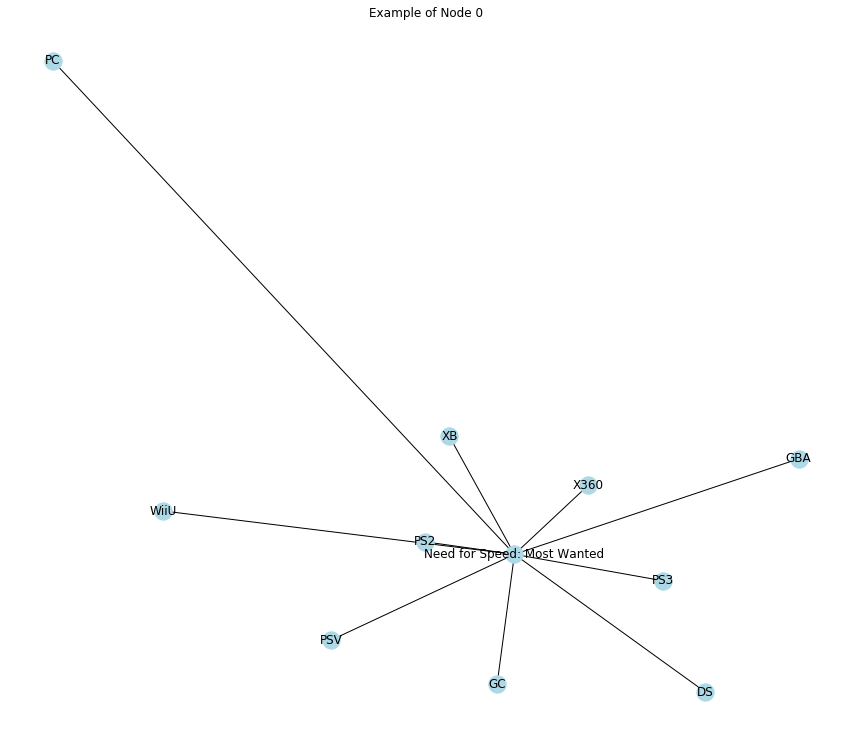

In [30]:
G = nx.from_pandas_edgelist(data,'node_1','node_2',edge_attr='weight')
G1 = nx.from_pandas_edgelist(data1,'node_1','node_2',edge_attr='weight')
print(nx.info(G))
plt.figure(figsize = (15,13))
plt.title("Example of Node 0")
nx.draw_networkx(G1, node_color='lightblue')
plt.axis('off')
plt.show(1)

<h3>Calculate the Length of each sub component</h3>

In [31]:
[len(c) for c in nx.connected_component_subgraphs(G)]

[11506, 7, 3, 4, 2, 2]

<h3>Get the Highest degree component</h3>

In [32]:
graphs = list(nx.connected_component_subgraphs(G))[0]
print(nx.info(graphs))

Name: 
Type: Graph
Number of nodes: 11506
Number of edges: 16580
Average degree:   2.8820


In [33]:
cf = pd.DataFrame()
cf['deg_centrality'] = nx.degree_centrality(graphs).values()
cf.index = list(graphs)
cf.sort_values(by=['deg_centrality'], ascending=False)
cf.head()

,deg_centrality
Wii Sports,0.000087
Wii,0.115080
Super Mario Bros.,0.000174
NES,0.008518
Mario Kart Wii,0.000087


<h3>Call Island Method to get threshold values</h3>

In [34]:
islands = []
islands=island_method(graphs)

<h3>Display the Threshold value</h3> 

In [35]:
for i in islands:
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))[0]))

0 7877 7873
2 296 191
4 98 13
6 54 11
8 33 8
10 19 6
12 15 6
14 13 6
16 7 2
18 7 2
20 7 2
22 7 2
24 5 2
26 5 2
28 4 2
30 2 2
32 2 2
34 2 2
36 2 2
38 2 2
40 2 2


<h3>Insights</h3>

Based on the above output, we can have 10 as the threshold value for the weight as most of nodes are preserved. It looks like the ideal threshold value.

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 13
Average degree:   1.3684


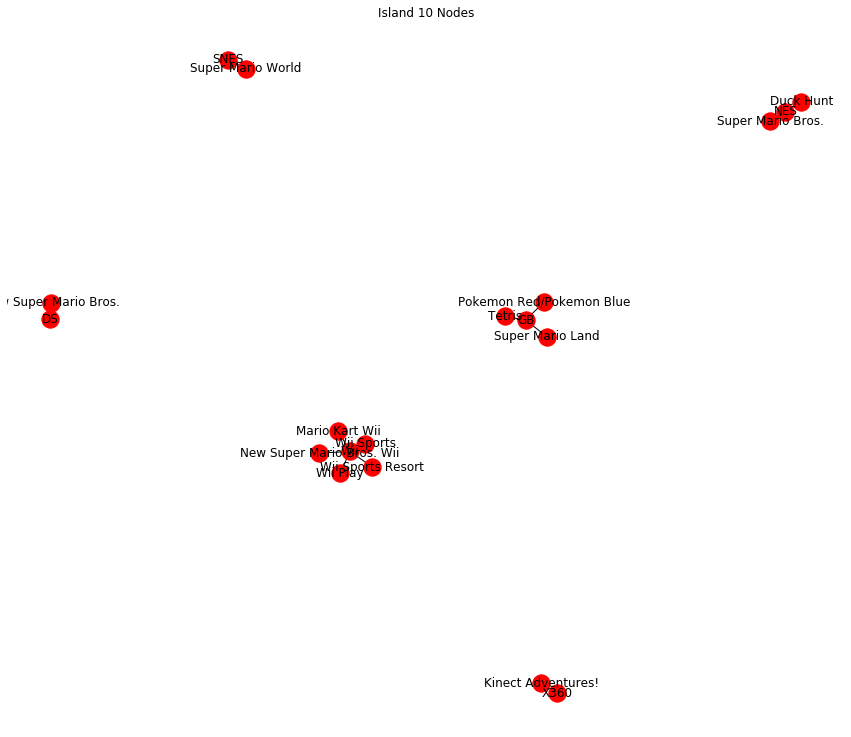

In [36]:
for i in islands:
    if(i[0]==10):
        out_graph=i
        break
print(nx.info(out_graph[1]))
plt.figure(figsize = (15,13))
plt.title("Island 10 Nodes")
nx.draw_networkx(out_graph[1], node_color='red')
plt.axis('off')
plt.show(1)